In [16]:
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 27.8 MB/s eta 0:00:0000:0100:01


In [36]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Step 2: Load dataset (update path if needed)
file_path = '/Users/devika/Desktop/IronHack/LabProbability/lab-eda-bivariate/amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(file_path)

# Step 3: Preview dataset
print("🔍 Dataset Overview:")
print(df.head())
print("\n🧱 Columns:", df.columns)
print("\n🕳️ Missing Values:")
print(df.isnull().sum())

🔍 Dataset Overview:
   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  

🧱 Columns: Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller


✅ Unique values in 'isBestSeller': [False  True]

🏆 Top Categories by Best-Seller Rate:
isBestSeller                    BestSeller_Rate
category                                       
Grocery                                0.058135
Smart Home Security & Lighting         0.057692
Health & Personal Care                 0.057686
Mobile Phone Accessories               0.042471
Power & Hand Tools                     0.035339
Billiard, Snooker & Pool               0.032129
Pet Supplies                           0.030200
Home Brewing & Wine Making             0.028455
Wind Instruments                       0.028000
Mirrors                                0.028000


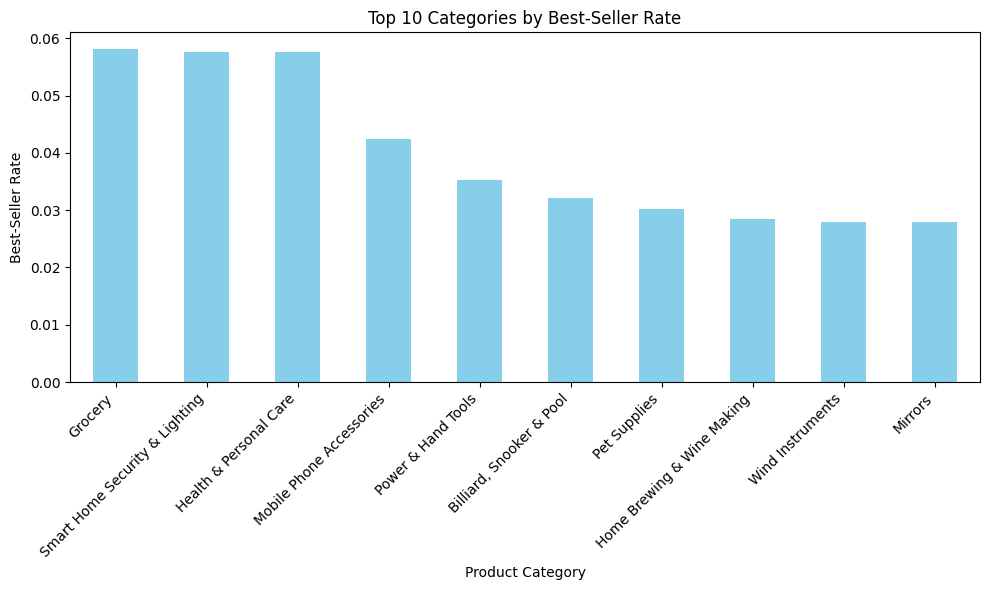


🧪 Chi-Square Test Result:
Chi2 Statistic: 36540.20
P-Value: 0.0000
✅ Significant association between product category and best-seller status.


/var/folders/8w/8drmpp8x5pd_qdpy7j5kkknc0000gp/T/ipykernel_980/52659491.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='isBestSeller', y='price', palette='Set2')


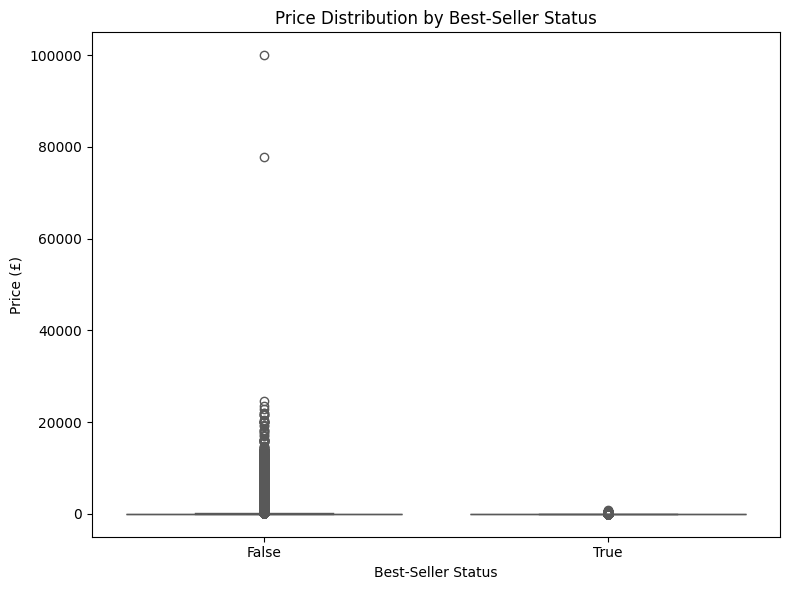

In [38]:
# Step 4: Check unique values in 'isBestSeller'
print("\n✅ Unique values in 'isBestSeller':", df['isBestSeller'].unique())

# Step 5: Crosstab analysis — Category vs isBestSeller
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Step 6: Handle 'Yes/No' or 'True/False' instead of 0/1
if 'Yes' in crosstab.columns:
    crosstab['Total'] = crosstab['Yes'] + crosstab.get('No', 0)
    crosstab['BestSeller_Rate'] = crosstab['Yes'] / crosstab['Total']
elif True in crosstab.columns:
    crosstab['Total'] = crosstab[True] + crosstab.get(False, 0)
    crosstab['BestSeller_Rate'] = crosstab[True] / crosstab['Total']
else:
    raise ValueError("Unexpected 'isBestSeller' values. Please check unique entries.")

# Step 7: Sort and display top categories by BestSeller Rate
crosstab_sorted = crosstab.sort_values(by='BestSeller_Rate', ascending=False)
print("\n🏆 Top Categories by Best-Seller Rate:")
print(crosstab_sorted[['BestSeller_Rate']].head(10))

# Step 8: Visualize Best-Seller Rate by Category
plt.figure(figsize=(10, 6))
crosstab_sorted['BestSeller_Rate'].head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Categories by Best-Seller Rate')
plt.ylabel('Best-Seller Rate')
plt.xlabel('Product Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 9: Chi-Square Test — Category vs Best-Seller
contingency_table = pd.crosstab(df['category'], df['isBestSeller'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\n🧪 Chi-Square Test Result:")
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"P-Value: {p:.4f}")
if p < 0.05:
    print("✅ Significant association between product category and best-seller status.")
else:
    print("❌ No significant association found.")

# Step 10: Visualize Price Distribution by Best-Seller Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='isBestSeller', y='price', palette='Set2')
plt.title('Price Distribution by Best-Seller Status')
plt.xlabel('Best-Seller Status')
plt.ylabel('Price (£)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()